In [3]:
!pip install ultralytics

import os
from ultralytics import YOLO
from IPython.display import display, Image
from IPython.display import Image as IPImage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 19.5 MB/s eta 0:00:0000:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
from IPython.display import Image as IPImage

In [7]:
DATASET_PATH = '/kaggle/input/facial-feature-extraction-dataset'
DATA_YAML = os.path.join(DATASET_PATH, 'Facial Feature Extraction Dataset/data.yaml')

In [9]:
def train_yolov8():
    """
    Initialize and train YOLOv8 model with specified parameters
    Returns:
        training results
    """
    model = YOLO('yolov8m.pt')
    
    results = model.train(
        data=DATA_YAML,        # data.yaml file from Roboflow
        epochs=20,             # number of epochs
        imgsz=640,            # image size
        batch=16,             # batch size
        name='yolov8_custom', # folder name for training results
        device='0',           # '0' for GPU, 'cpu' for CPU
        patience=50,          # early stopping patience
        save=True,            # save best model
        pretrained=True,      # use pretrained weights
        plots=True,           # save training plots
        cache=True            # enable caching
    )
    
    return results

def evaluate_model(model_path):
    """
    Evaluate trained model using validation dataset
    Args:
        model_path: path to the trained model weights
    Returns:
        evaluation metrics
    """
    model = YOLO(model_path)
    metrics = model.val()
    return metrics

def visualize_metrics(metrics):
    """
    Create visualizations for model performance metrics
    Args:
        metrics: model evaluation metrics
    """
    # Create a DataFrame for metrics
    metrics_dict = {
        'Metric': ['Precision', 'Recall', 'mAP50', 'mAP50-95'],
        'Value': [
            metrics.results_dict['metrics/precision(B)'],
            metrics.results_dict['metrics/recall(B)'],
            metrics.results_dict['metrics/mAP50(B)'],
            metrics.results_dict['metrics/mAP50-95(B)']
        ]
    }
    df_metrics = pd.DataFrame(metrics_dict)
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_metrics, x='Metric', y='Value')
    plt.title('Model Performance Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Display class-wise mAP
    print("\nClass-wise mAP Scores:")
    for class_name, map_score in zip(metrics.names.values(), metrics.maps):
        print(f"{class_name}: {map_score:.3f}")

### Execute Training

In [17]:
def main():
    # Verify data path
    if not os.path.exists(DATA_YAML):
        raise FileNotFoundError(f"data.yaml file not found: {DATA_YAML}")
    
    print("🚀 Training started...")
    print(f"📁 Dataset path: {DATASET_PATH}")
    
    # Train model
    results = train_yolov8()
    
    # Evaluate best model
    best_model_path = f'runs/detect/yolov8_custom/weights/best.pt'
    metrics = evaluate_model(best_model_path)
    
    print("\n✨ Training completed!")
    print(f"💾 Best model saved at: {best_model_path}")
    
    print("\n📊 Model Performance Summary:")
    print("=" * 50)
    print(f"Precision: {metrics.results_dict['metrics/precision(B)']:.3f}")
    print(f"Recall: {metrics.results_dict['metrics/recall(B)']:.3f}")
    print(f"mAP50: {metrics.results_dict['metrics/mAP50(B)']:.3f}")
    print(f"mAP50-95: {metrics.results_dict['metrics/mAP50-95(B)']:.3f}")
    print("=" * 50)

if __name__ == "__main__":
    main()

🚀 Training started...
📁 Dataset path: /kaggle/input/facial-feature-extraction-dataset
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=None, name=yolov8_custom2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

train: Scanning /kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/train/labels... 457 images, 0 backgrounds, 0 corrupt: 100%|██████████| 457/457 [00:00<00:00, 542.73it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/train is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 457/457 [00:00<00:00, 591.60it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/valid/labels... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<00:00, 388.00it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/valid is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 126/126 [00:00<00:00, 164.42it/s]


Plotting labels to runs/detect/yolov8_custom2/labels.jpg... 

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)


Exception in thread Thread-98 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 55, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 32, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reductions.py", line 496, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.10/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3

TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8_custom2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      9.31G      2.326       4.35      2.202        113        640:  28%|██▊       | 8/29 [00:05<00:13,  1.54it/s]


KeyboardInterrupt: 

In [11]:
# Load trained model
model = YOLO('runs/detect/yolov8_custom/weights/best.pt')

In [35]:
# Perform inference
results = model.predict('/kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/test/images/Central-Asia_jpeg.rf.65c9cec4c1036e79c7f5033aba15e9ae.jpg', save=True)


image 1/1 /kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/test/images/Central-Asia_jpeg.rf.65c9cec4c1036e79c7f5033aba15e9ae.jpg: 640x640 1 eye, 1 eyebrow, 1 lip, 1 mustache-beard, 1 nose, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


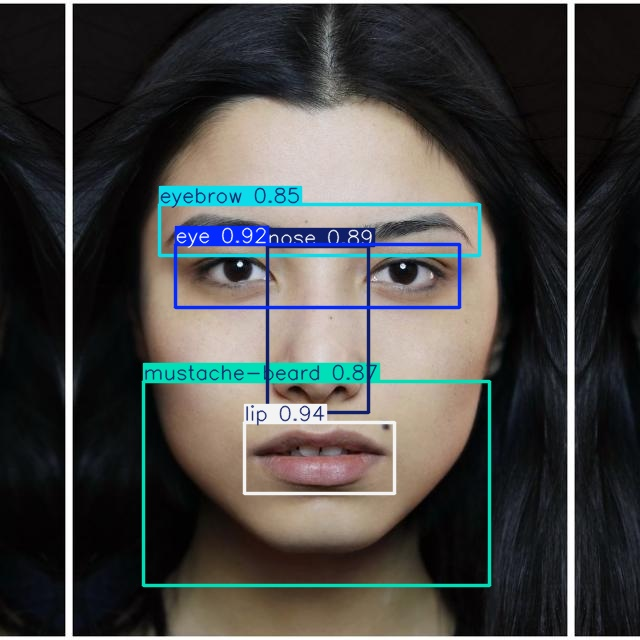

In [38]:
display(IPImage(filename='/kaggle/working/runs/detect/predict/Central-Asia_jpeg.rf.65c9cec4c1036e79c7f5033aba15e9ae.jpg'))


image 1/1 /kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/test/images/Central-Asia_jpeg.rf.65c9cec4c1036e79c7f5033aba15e9ae.jpg: 640x640 1 eye, 1 eyebrow, 1 lip, 1 mustache-beard, 1 nose, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

=== Facial Feature Distances ===
------------------------------
lip_to_eye               : 182.26 pixels
lip_to_nose              : 128.72 pixels
lip_to_mustache-beard    : 25.55 pixels
lip_to_eyebrow           : 228.56 pixels
eye_to_nose              : 53.54 pixels
eye_to_mustache-beard    : 207.63 pixels
eye_to_eyebrow           : 46.35 pixels
nose_to_mustache-beard   : 154.09 pixels
nose_to_eyebrow          : 99.87 pixels
mustache-beard_to_eyebrow: 253.96 pixels

=== Facial Proportions ===
------------------------------
nose_to_lip              : 128.72 pixels


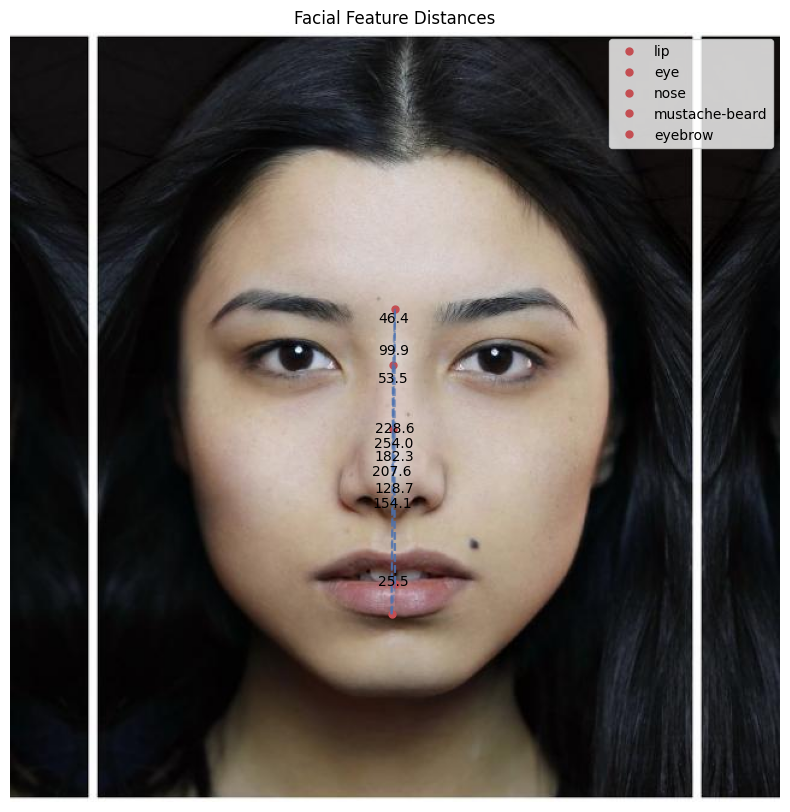

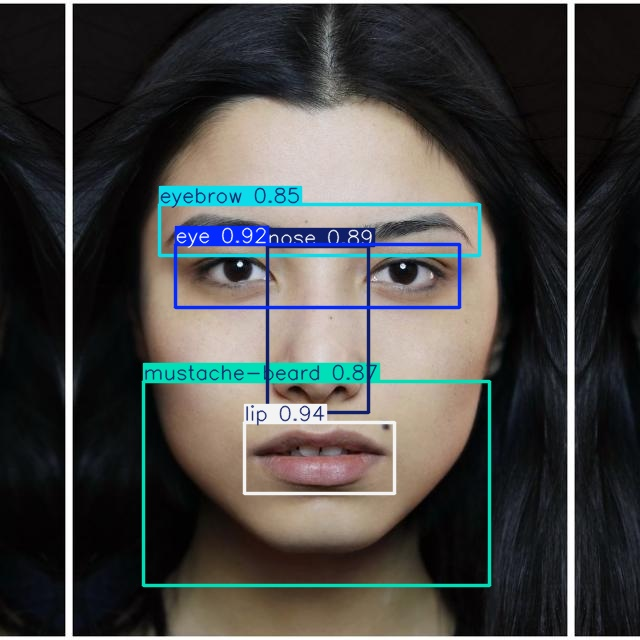

In [42]:
# Import required libraries if not already imported
from PIL import Image
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import display, Image as IPImage

# Load and perform inference
image_path = '/kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/test/images/Central-Asia_jpeg.rf.65c9cec4c1036e79c7f5033aba15e9ae.jpg'
results = model.predict(image_path, save=True)

# Get the first result (assuming single image)
result = results[0]

# Format detections for the calculator
detections = []
for box in result.boxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Get box coordinates
    width = x2 - x1
    height = y2 - y1
    confidence = box.conf[0].cpu().numpy()
    class_id = box.cls[0].cpu().numpy()
    label = result.names[int(class_id)]  # Get class name
    
    detections.append([label, x1, y1, width, height, confidence])

# Create calculator instance
calculator = FacialFeatureDistanceCalculator()

# Add detected feature points
for detection in detections:
    feature_name = detection[0]
    center_x = detection[1] + detection[3]/2  # x + width/2
    center_y = detection[2] + detection[4]/2  # y + height/2
    calculator.add_feature_point(feature_name, (center_x, center_y))

# Calculate distances and proportions
distances = calculator.calculate_all_distances()
proportions = calculator.get_facial_proportions()

# Print results
print_distances_and_proportions(distances, proportions)

# Load and display the image with measurements
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize_distances(image, distances, calculator.feature_points)

# Display the YOLO prediction result
display(IPImage(filename='/kaggle/working/runs/detect/predict/Central-Asia_jpeg.rf.65c9cec4c1036e79c7f5033aba15e9ae.jpg'))


image 1/1 /kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/test/images/Corinne-Russell_jpeg.rf.a86c1d1edc954de9904096d1c784693e.jpg: 640x640 1 eye, 1 eyebrow, 1 lip, 1 mustache-beard, 1 nose, 16.3ms
Speed: 1.7ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

=== FACIAL ANALYSIS SUMMARY ===

1. Detected Features:
--------------------------------------------------
Feature         Confidence   Location (x, y)
--------------------------------------------------
lip                   0.94    ( 320.0,  425.8)
nose                  0.92    ( 320.0,  317.5)
eye                   0.90    ( 321.1,  272.7)
mustache-beard        0.90    ( 320.7,  447.3)
eyebrow               0.87    ( 322.7,  229.7)

2. Feature Distances:
--------------------------------------------------
Feature Pair              Distance (px)   Confidence
--------------------------------------------------
lip_to_nose      

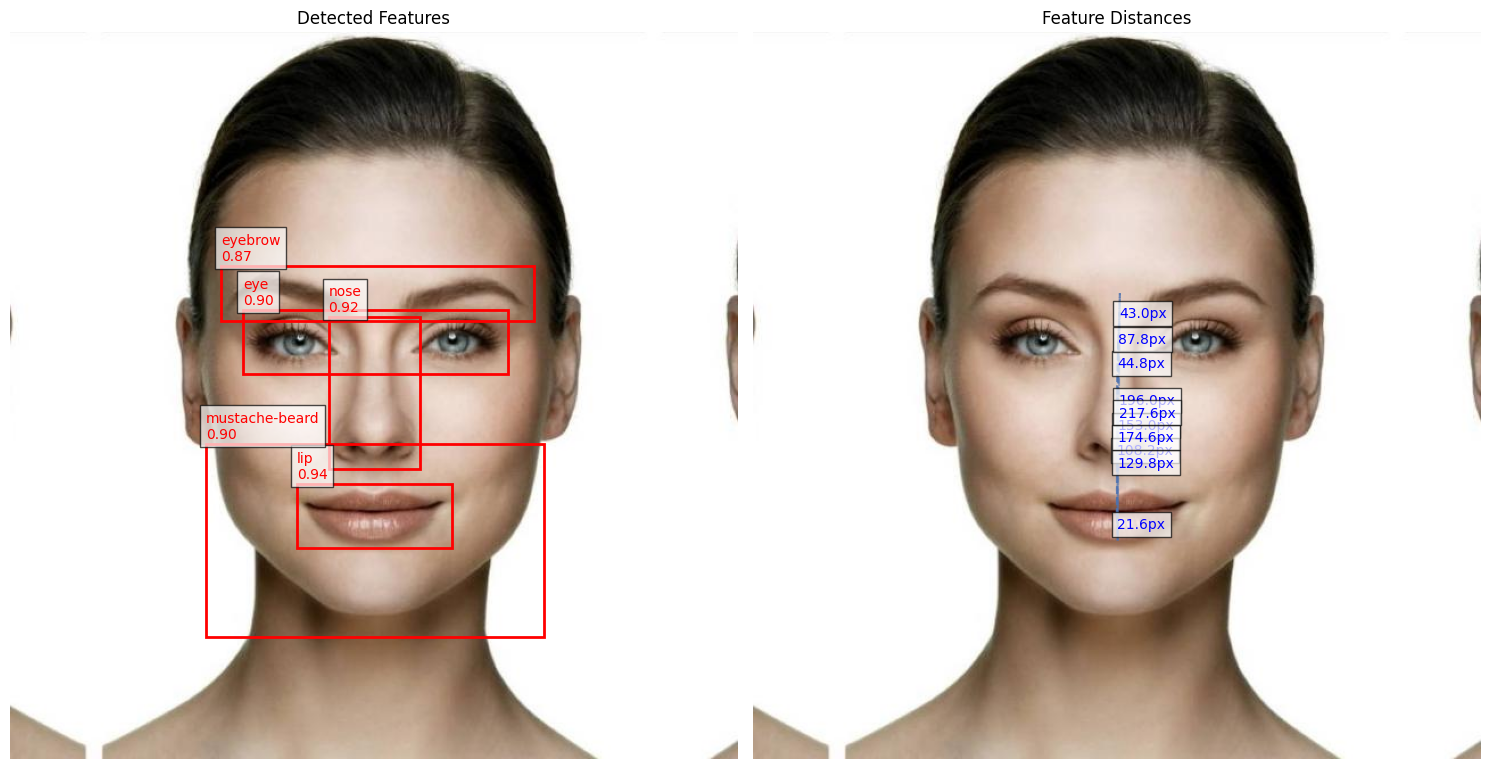

In [48]:
import numpy as np
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

class FacialAnalyzer:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = cv2.imread(image_path)
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        self.features = {}
        self.distances = {}
        
    def process_yolo_results(self, results):
        """Process YOLO detection results"""
        result = results[0]  # Get first result
        
        # Clear previous features
        self.features.clear()
        
        # Process each detection
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            confidence = float(box.conf[0].cpu().numpy())
            class_id = int(box.cls[0].cpu().numpy())
            label = result.names[class_id]
            
            # Store center point of feature
            center_x = (x1 + x2) / 2
            center_y = (y1 + y2) / 2
            
            self.features[label] = {
                'center': (center_x, center_y),
                'confidence': confidence,
                'bbox': (x1, y1, x2, y2)
            }
    
    def calculate_distances(self):
        """Calculate distances between facial features"""
        self.distances.clear()
        feature_names = list(self.features.keys())
        
        for i in range(len(feature_names)):
            for j in range(i + 1, len(feature_names)):
                name1, name2 = feature_names[i], feature_names[j]
                point1 = self.features[name1]['center']
                point2 = self.features[name2]['center']
                
                # Calculate Euclidean distance
                dist = np.sqrt(((point1[0] - point2[0]) ** 2) + 
                             ((point1[1] - point2[1]) ** 2))
                
                self.distances[f"{name1}_to_{name2}"] = {
                    'distance': dist,
                    'confidence': min(self.features[name1]['confidence'],
                                    self.features[name2]['confidence'])
                }
    
    def visualize(self, show_confidence=True):
        """Create comprehensive visualization"""
        plt.figure(figsize=(15, 10))
        
        # Create two subplots
        plt.subplot(1, 2, 1)
        plt.imshow(self.image)
        
        # Draw bounding boxes
        for feature_name, data in self.features.items():
            x1, y1, x2, y2 = data['bbox']
            conf = data['confidence']
            
            # Draw rectangle
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                            fill=False, color='red', linewidth=2))
            
            # Add label with confidence
            label = f"{feature_name}\n{conf:.2f}" if show_confidence else feature_name
            plt.text(x1, y1-5, label, color='red',
                    bbox=dict(facecolor='white', alpha=0.7))
        
        plt.title("Detected Features")
        plt.axis('off')
        
        # Draw distance measurements
        plt.subplot(1, 2, 2)
        plt.imshow(self.image)
        
        # Draw lines between features with distances
        for pair, data in self.distances.items():
            feature1, feature2 = pair.split('_to_')
            point1 = self.features[feature1]['center']
            point2 = self.features[feature2]['center']
            
            # Draw line
            plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 
                    'b--', alpha=0.5)
            
            # Add distance label
            mid_x = (point1[0] + point2[0]) / 2
            mid_y = (point1[1] + point2[1]) / 2
            plt.text(mid_x, mid_y, f'{data["distance"]:.1f}px',
                    color='blue', bbox=dict(facecolor='white', alpha=0.7))
        
        plt.title("Feature Distances")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    def print_summary(self):
        """Print organized summary of detections and measurements"""
        print("\n=== FACIAL ANALYSIS SUMMARY ===")
        
        print("\n1. Detected Features:")
        print("-" * 50)
        print(f"{'Feature':<15} {'Confidence':<12} {'Location (x, y)'}")
        print("-" * 50)
        for name, data in self.features.items():
            x, y = data['center']
            conf = data['confidence']
            print(f"{name:<15} {conf:>10.2f}    ({x:>6.1f}, {y:>6.1f})")
        
        print("\n2. Feature Distances:")
        print("-" * 50)
        print(f"{'Feature Pair':<25} {'Distance (px)':<15} {'Confidence'}")
        print("-" * 50)
        for pair, data in self.distances.items():
            dist = data['distance']
            conf = data['confidence']
            print(f"{pair:<25} {dist:>13.1f}    {conf:>9.2f}")

# Example usage
def analyze_face(image_path, model):
    # Create analyzer instance
    analyzer = FacialAnalyzer(image_path)
    
    # Run YOLO prediction
    results = model.predict(image_path, save=True)
    
    # Process results
    analyzer.process_yolo_results(results)
    analyzer.calculate_distances()
    
    # Show results
    analyzer.print_summary()
    analyzer.visualize()
    
    return analyzer

# Use the analyzer

image_path = '/kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/test/images/Corinne-Russell_jpeg.rf.a86c1d1edc954de9904096d1c784693e.jpg'
analyzer = analyze_face(image_path, model)



image 1/1 /kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/test/images/Rob-Heaps_jpeg.rf.9510b2af3312d7e9e6a9349a9d85ec16.jpg: 640x640 1 eye, 1 eyebrow, 1 lip, 1 mustache-beard, 1 nose, 16.5ms
Speed: 1.8ms preprocess, 16.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

=== FACIAL ANALYSIS SUMMARY ===

1. Detected Features:
--------------------------------------------------
Feature         Confidence   Location (x, y)
--------------------------------------------------
mustache-beard        0.92    ( 359.2,  407.4)
lip                   0.91    ( 359.4,  384.4)
nose                  0.90    ( 361.4,  293.6)
eye                   0.85    ( 357.8,  249.4)
eyebrow               0.84    ( 357.0,  232.8)

2. Feature Distances:
--------------------------------------------------
Feature Pair              Distance (px)   Confidence
--------------------------------------------------
mustache-beard_to_lip  

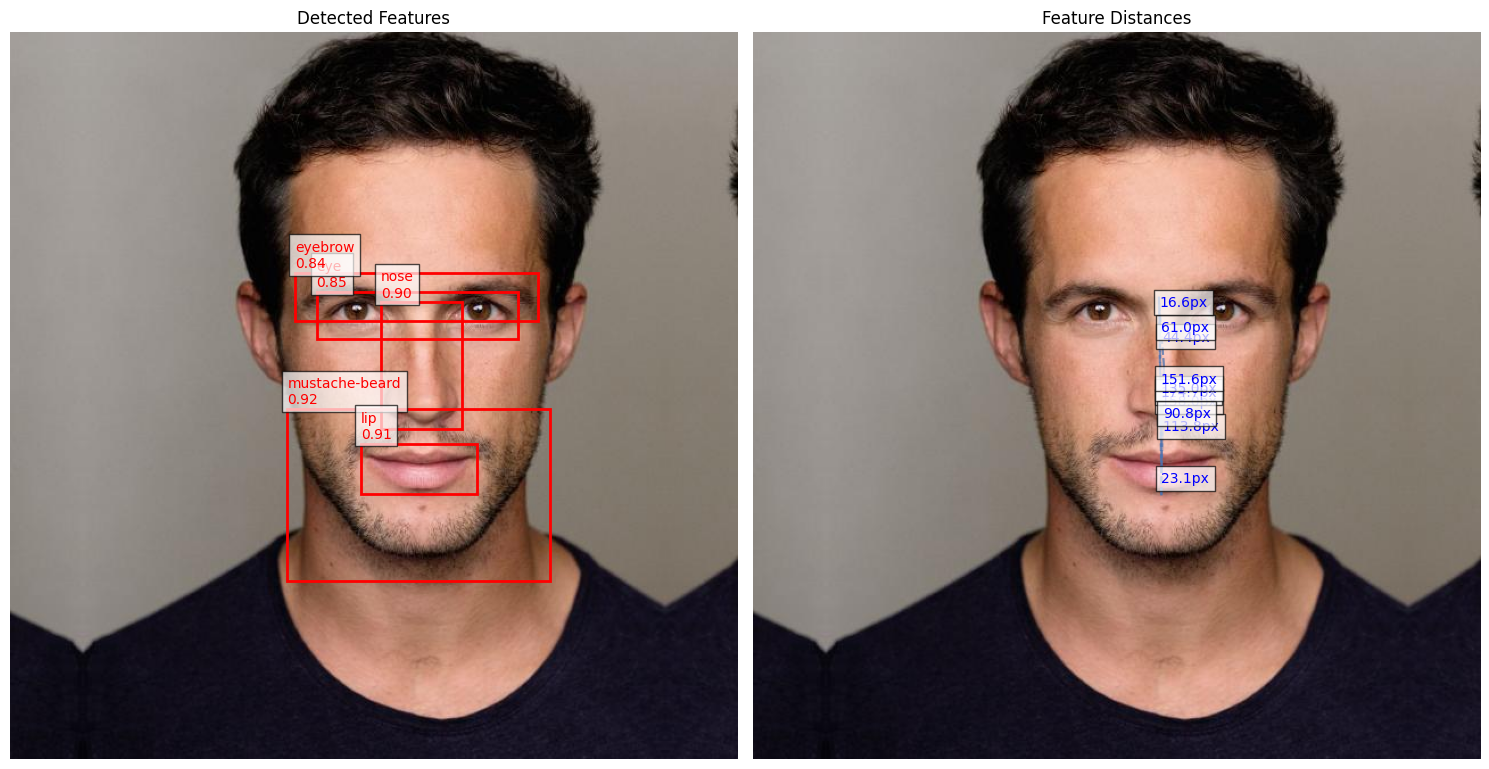

In [50]:
import numpy as np
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

class FacialAnalyzer:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = cv2.imread(image_path)
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        self.features = {}
        self.distances = {}
        
    def process_yolo_results(self, results):
        """Process YOLO detection results"""
        result = results[0]  # Get first result
        
        # Clear previous features
        self.features.clear()
        
        # Process each detection
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            confidence = float(box.conf[0].cpu().numpy())
            class_id = int(box.cls[0].cpu().numpy())
            label = result.names[class_id]
            
            # Store center point of feature
            center_x = (x1 + x2) / 2
            center_y = (y1 + y2) / 2
            
            self.features[label] = {
                'center': (center_x, center_y),
                'confidence': confidence,
                'bbox': (x1, y1, x2, y2)
            }
    
    def calculate_distances(self):
        """Calculate distances between facial features"""
        self.distances.clear()
        feature_names = list(self.features.keys())
        
        for i in range(len(feature_names)):
            for j in range(i + 1, len(feature_names)):
                name1, name2 = feature_names[i], feature_names[j]
                point1 = self.features[name1]['center']
                point2 = self.features[name2]['center']
                
                # Calculate Euclidean distance
                dist = np.sqrt(((point1[0] - point2[0]) ** 2) + 
                             ((point1[1] - point2[1]) ** 2))
                
                self.distances[f"{name1}_to_{name2}"] = {
                    'distance': dist,
                    'confidence': min(self.features[name1]['confidence'],
                                    self.features[name2]['confidence'])
                }
    
    def visualize(self, show_confidence=True):
        """Create comprehensive visualization"""
        plt.figure(figsize=(15, 10))
        
        # Create two subplots
        plt.subplot(1, 2, 1)
        plt.imshow(self.image)
        
        # Draw bounding boxes
        for feature_name, data in self.features.items():
            x1, y1, x2, y2 = data['bbox']
            conf = data['confidence']
            
            # Draw rectangle
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                            fill=False, color='red', linewidth=2))
            
            # Add label with confidence
            label = f"{feature_name}\n{conf:.2f}" if show_confidence else feature_name
            plt.text(x1, y1-5, label, color='red',
                    bbox=dict(facecolor='white', alpha=0.7))
        
        plt.title("Detected Features")
        plt.axis('off')
        
        # Draw distance measurements
        plt.subplot(1, 2, 2)
        plt.imshow(self.image)
        
        # Draw lines between features with distances
        for pair, data in self.distances.items():
            feature1, feature2 = pair.split('_to_')
            point1 = self.features[feature1]['center']
            point2 = self.features[feature2]['center']
            
            # Draw line
            plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 
                    'b--', alpha=0.5)
            
            # Add distance label
            mid_x = (point1[0] + point2[0]) / 2
            mid_y = (point1[1] + point2[1]) / 2
            plt.text(mid_x, mid_y, f'{data["distance"]:.1f}px',
                    color='blue', bbox=dict(facecolor='white', alpha=0.7))
        
        plt.title("Feature Distances")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    def print_summary(self):
        """Print organized summary of detections and measurements"""
        print("\n=== FACIAL ANALYSIS SUMMARY ===")
        
        print("\n1. Detected Features:")
        print("-" * 50)
        print(f"{'Feature':<15} {'Confidence':<12} {'Location (x, y)'}")
        print("-" * 50)
        for name, data in self.features.items():
            x, y = data['center']
            conf = data['confidence']
            print(f"{name:<15} {conf:>10.2f}    ({x:>6.1f}, {y:>6.1f})")
        
        print("\n2. Feature Distances:")
        print("-" * 50)
        print(f"{'Feature Pair':<25} {'Distance (px)':<15} {'Confidence'}")
        print("-" * 50)
        for pair, data in self.distances.items():
            dist = data['distance']
            conf = data['confidence']
            print(f"{pair:<25} {dist:>13.1f}    {conf:>9.2f}")

# Example usage
def analyze_face(image_path, model):
    # Create analyzer instance
    analyzer = FacialAnalyzer(image_path)
    
    # Run YOLO prediction
    results = model.predict(image_path, save=True)
    
    # Process results
    analyzer.process_yolo_results(results)
    analyzer.calculate_distances()
    
    # Show results
    analyzer.print_summary()
    analyzer.visualize()
    
    return analyzer

# Use the analyzer

image_path = '/kaggle/input/facial-feature-extraction-dataset/Facial Feature Extraction Dataset/test/images/Rob-Heaps_jpeg.rf.9510b2af3312d7e9e6a9349a9d85ec16.jpg'
analyzer = analyze_face(image_path, model)
